# Binary Classifiers - SEER Breast Cancer Data

The dataset includes the following independent features and target variable:

**Numerical Attribute:**
- Age: Age of patient at diagnosis
- Tumor Size: Size of tumor at diagnosis
- Regional Node Examined
- Reginol Node Positive
- Survival Months

**Categorical Attribute:**
- Race: Race of patient (white, other (American Indian/ AK Native, Asian/ Pacific Islander)
- Marital Status: Married (including common law), Single (never married), other)
- T Stage: Tumor Size (T2, T1, other)
- N Stage: Number of lymph nodes involved (N1, N2, other)
- 6th Stage: Overall stage of cancer (IIA, IIB, other)
- Grade: Grade of cancer (Moderately differentiated; Grade II, Poorly differentiated; Grade III, other)
- A Stage: Distant metastasis status (Regional, Distant)
- Estrogen Status
- Progesterone Status

**Target Variable:**
- Status: Alive or Dead

## A. Importing Libraries and Dataset

In [1]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Desktop/Breast_Cancer_Dataset_prepared.csv")

In [3]:
df.head()

,Unnamed: 0,Age,T Stage,N Stage,6th Stage,Grade,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months,...,Marital Status_Married (including common law),Marital Status_Separated,Marital Status_Single (never married),Marital Status_Widowed,A Stage_Distant,A Stage_Regional,Estrogen Status_Negative,Estrogen Status_Positive,Progesterone Status_Negative,Progesterone Status_Positive
0,0,-1.224296,1,2,4,1,1.019503,1.029619,1.252763,0.002350,...,1,0,0,0,0,1,0,1,0,1
1,1,-0.777968,1,1,2,1,1.098309,1.223775,1.098612,0.031271,...,1,0,0,0,0,1,0,1,0,1
2,2,1.453671,1,0,1,2,0.737164,0.262364,0.000000,0.031271,...,1,0,0,0,0,1,0,1,0,1
3,3,-0.889550,0,0,0,1,0.597337,1.252763,0.000000,0.031271,...,0,0,0,0,0,1,0,1,0,1
4,4,1.007343,1,1,2,1,0.933952,1.098612,0.693147,0.059378,...,1,0,0,0,0,1,0,1,0,1


In [4]:
df.tail()

,Unnamed: 0,Age,T Stage,N Stage,6th Stage,Grade,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months,...,Marital Status_Married (including common law),Marital Status_Separated,Marital Status_Single (never married),Marital Status_Widowed,A Stage_Distant,A Stage_Regional,Estrogen Status_Negative,Estrogen Status_Positive,Progesterone Status_Negative,Progesterone Status_Positive
4019,4019,-0.220058,0,0,0,0,0.342299,1.029619e+00,0.000000,1.415853,...,1,0,0,0,0,1,0,1,0,1
4020,4020,-0.108476,0,1,2,2,0.309488,7.884574e-01,0.693147,1.415853,...,1,0,0,0,0,1,1,0,1,0
4021,4021,-0.108476,0,0,0,1,0.309488,2.623643e-01,0.223144,1.415853,...,0,0,0,0,0,1,1,0,1,0
4022,4022,0.672598,0,0,0,1,0.309488,8.329091e-01,0.223144,1.415853,...,1,0,0,0,0,1,0,1,0,1
4023,4023,0.895761,0,0,0,1,0.275563,-2.220446e-16,0.000000,1.415853,...,0,0,0,0,0,1,0,1,0,1


In [5]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.tail()

,Age,T Stage,N Stage,6th Stage,Grade,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months,Status,...,Marital Status_Married (including common law),Marital Status_Separated,Marital Status_Single (never married),Marital Status_Widowed,A Stage_Distant,A Stage_Regional,Estrogen Status_Negative,Estrogen Status_Positive,Progesterone Status_Negative,Progesterone Status_Positive
4019,-0.220058,0,0,0,0,0.342299,1.029619e+00,0.000000,1.415853,0,...,1,0,0,0,0,1,0,1,0,1
4020,-0.108476,0,1,2,2,0.309488,7.884574e-01,0.693147,1.415853,0,...,1,0,0,0,0,1,1,0,1,0
4021,-0.108476,0,0,0,1,0.309488,2.623643e-01,0.223144,1.415853,0,...,0,0,0,0,0,1,1,0,1,0
4022,0.672598,0,0,0,1,0.309488,8.329091e-01,0.223144,1.415853,0,...,1,0,0,0,0,1,0,1,0,1
4023,0.895761,0,0,0,1,0.275563,-2.220446e-16,0.000000,1.415853,0,...,0,0,0,0,0,1,0,1,0,1


## B. Splitting Dataset into Train and Test Data

We will split the features and outcomes into training and test data using the following code.

In [6]:
y = df['Status']
X = df.drop('Status', axis=1)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y)

## C. Model Development

### 1. Logisitc Regression

By default, the solver is equal to **lbfgs**. But since it is not a small dataset, we will choose **sag** and **saga** as solver.  The default max_iter is equal to 100. We will increase the max_iter to 10000. Thereore, we will instantiate a Logistic Regression Model with the following code.

In [8]:
lr = LogisticRegression(solver='saga',max_iter=10000)

We will fit the Logistic Regression Model to the training data using the following code.

In [9]:
lr.fit(X_train, y_train)

LogisticRegression(max_iter=10000, solver='saga')

We will get the intercept using the following code.

In [10]:
intercept = lr.intercept_
print(intercept)

[2.86225191]


The intercept term in the model output represent the log odds of the response variable occurring when all predictor variables are equal to zero. This means that when Age is equal to zero, when T Stage is equal to zero, and so on, the log odds whether a patient is alive or dead are 2.39.

We will extract the coefficients using the following code.

In [11]:
coefficients = lr.coef_

We will place the coefficients into list as follows.

In [12]:
coef_list = list(coefficients[0,:])

We will match the features to their contributions, place them in a DataFrame, and print the DataFrame.

In [13]:
coef_df = pd.DataFrame({'Feature': list(X_train.columns), 
                       'Coefficients': coef_list })
print(coef_df)

                                              Feature  Coefficients
0                                                 Age      0.254057
1                                            T Stage       0.469958
2                                             N Stage      0.249129
3                                           6th Stage     -0.061711
4                                               Grade      0.552821
5                                          Tumor Size     -0.417827
6                              Regional Node Examined     -0.625846
7                               Reginol Node Positive      0.887421
8                                     Survival Months     -5.061648
9                                         Race _Black      0.590920
10  Race _Other (American Indian/AK Native, Asian/...     -0.608368
11                                        Race _White      0.100413
12                            Marital Status_Divorced     -0.163469
13      Marital Status_Married (including common

The coefficient for T Stage can be interpreted as for every degree increase in Tumor Size, the log odds of status increase by 0.05.

<AxesSubplot:ylabel='Feature'>

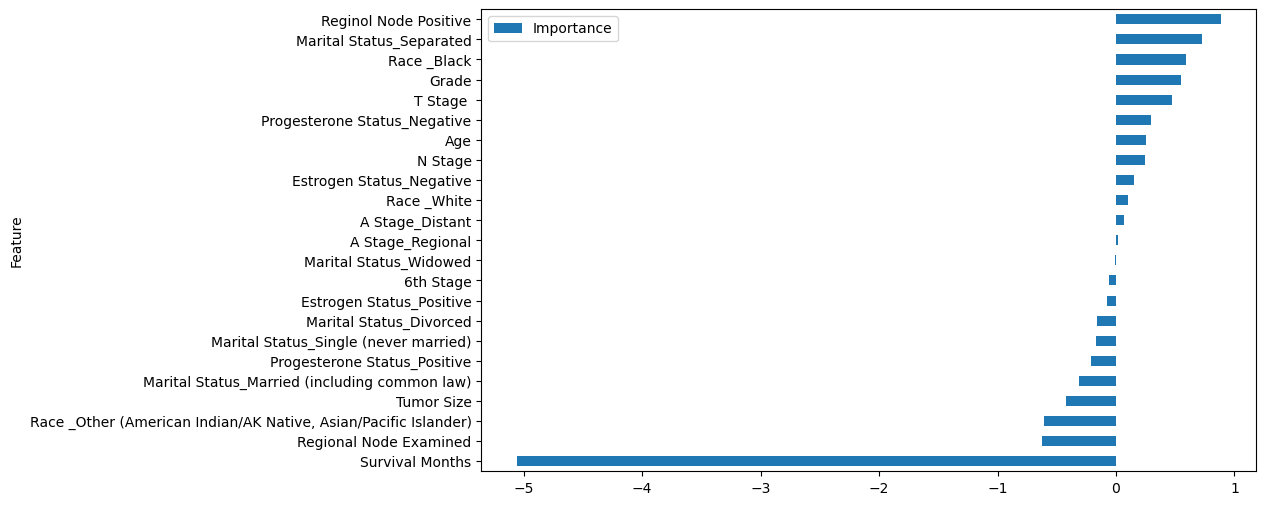

In [14]:
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': coef_list })
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

The coefficients represent the change in the log odds for one unit change in the predictor variable. Larger absolute values indicate a stronger relationship between the predictor and the target variable. According to this method, `Survival Months` and `Reginol Node Positive` are  the most important features.

We will generate predicted probabilities using the following code.

In [15]:
predicted_prob = lr.predict_proba(X_test)[:,1]

We will generate predicted classes using the following code.

In [16]:
predicted_class = lr.predict(X_test)

We will evaluate the performance using confsion matrix.

In [17]:
cm = pd.DataFrame(confusion_matrix(y_test, predicted_class))
cm['Total'] = np.sum(cm, axis = 1)
cm = cm.append(np.sum(cm, axis=1), ignore_index=True)
cm.columns = ['Predicted Alive','Predicted Dead','Total']
cm = cm.set_index([['Alive','Dead','Total']])
print(cm)

       Predicted Alive  Predicted Dead  Total
Alive            660.0            22.0  682.0
Dead              72.0            51.0  123.0
Total           1364.0           246.0    NaN


From the confusion matrix, we can see that 682 observations that were classified as alive, 667 were classified correctly, and of the 123 observations that were classified as dead, 53 were correctly classified.

We will generate a classification report using the following code.

In [18]:
print(classification_report(y_test, predicted_class))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       682
           1       0.70      0.41      0.52       123

    accuracy                           0.88       805
   macro avg       0.80      0.69      0.73       805
weighted avg       0.87      0.88      0.87       805



To tune the model, we will use skicit's learn grid search function, which fits a model for every combination of possible hyperparameter values and determines the value for each hyperparameter resulting in the best model. Since the solvers **sag** don't support l1 penalty, we will not use them. We will instantiate a grid of possible hyperparameters.

In [19]:
grid = {'penalty': ['l1','l2'],
        'C': np.linspace(1,10,10),
        'solver': ['liblinear'] }

We will instantiate a GridSearch model to find the model with the greatest f1 score (the harmonic average of precision and recall).

In [20]:
model_lr = GridSearchCV(LogisticRegression(), grid, scoring='f1', cv=5, error_score='raise')

We will fit the model on the training data using the following code.

In [21]:
model_lr.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise', estimator=LogisticRegression(),
             param_grid={'C': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='f1')

We can return the optimal combinations of hyperparameters as a dictionary as follows.

In [22]:
best_parameters = model_lr.best_params_
print(best_parameters)

{'C': 9.0, 'penalty': 'l1', 'solver': 'liblinear'}


We have found the hyperparameters that maximise the f1 score.

In [23]:
lr_optimised = LogisticRegression(C=9.0,penalty='l1',solver='liblinear')

In [24]:
lr_optimised.fit(X_train, y_train)

LogisticRegression(C=9.0, penalty='l1', solver='liblinear')

In [25]:
lr_optimised_pred = lr_optimised.predict(X_test)

In [26]:
cm = pd.DataFrame(confusion_matrix(y_test, lr_optimised_pred))
cm['Total'] = np.sum(cm, axis = 1)
cm = cm.append(np.sum(cm, axis=1), ignore_index=True)
cm.columns = ['Predicted Alive','Predicted Dead','Total']
cm = cm.set_index([['Alive','Dead','Total']])
print(cm)

       Predicted Alive  Predicted Dead  Total
Alive            657.0            25.0  682.0
Dead              71.0            52.0  123.0
Total           1364.0           246.0    NaN


From the confusion matrix, we can see that 682 observations that were classified as alive, 657 were classified correctly, and of the 123 observations that were classified as dead, 52 were correctly classified.

In [27]:
print(classification_report(y_test, lr_optimised_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       682
           1       0.68      0.42      0.52       123

    accuracy                           0.88       805
   macro avg       0.79      0.69      0.73       805
weighted avg       0.87      0.88      0.87       805



### 2. DecisionTree Classifier

We will instantiate the Decision Tree Classifier using the following code.

In [28]:
dt = DecisionTreeClassifier()

We will fit the Decision Tree Classifier to the training data using the following code.

In [29]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

We will calculate the predicting accuracy for the training data.

In [30]:
dt_pred_train = dt.predict(X_train)

We will calculate the predicting accuracy for the test data.

In [31]:
dt_pred_test = dt.predict(X_test)

In [32]:
print('Decision Tree:\n> Accuracy on training data = {:.4f}\n> Accuracy on validation data = {:.4f}'.format( accuracy_score(y_true=y_train, y_pred=dt_pred_train), accuracy_score(y_true=y_test, y_pred=dt_pred_test)))

Decision Tree:
> Accuracy on training data = 1.0000
> Accuracy on validation data = 0.8497


DecisionTree Classifier has much lower accuracy on test data than on training data.

In [33]:
cm = pd.DataFrame(confusion_matrix(y_test, dt_pred_test))
cm['Total'] = np.sum(cm, axis = 1)
cm = cm.append(np.sum(cm, axis=1), ignore_index=True)
cm.columns = ['Predicted Alive','Predicted Dead','Total']
cm = cm.set_index([['Alive','Dead','Total']])
print(cm)

       Predicted Alive  Predicted Dead  Total
Alive            623.0            59.0  682.0
Dead              62.0            61.0  123.0
Total           1364.0           246.0    NaN


From the confusion matrix, we can see that 682 observations that were classified as alive, 623 were classified correctly, and of the 123 observations that were classified as dead, 61 were correctly classified.

In [34]:
print(classification_report(y_test, dt_pred_test))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       682
           1       0.51      0.50      0.50       123

    accuracy                           0.85       805
   macro avg       0.71      0.70      0.71       805
weighted avg       0.85      0.85      0.85       805



We will instantiate a hyperparameter space and tune the hyperparameters  of a decision tree classifier using a grid search. We will specify the hyperparameter space as follows.

In [35]:
grid_dt = {'class_weight': ['balanced'],
           'criterion': ['gini','entropy'],
           'min_weight_fraction_leaf': np.linspace(0.0,0.5,10),
           'min_impurity_decrease': np.linspace(0.0,1.0,10)}

We will instantiate a grid search model using the following code.

In [36]:
model_dt = GridSearchCV(DecisionTreeClassifier(),grid_dt,scoring='f1',cv=5,error_score='raise')

We will fit to the training dataset using the following code.

In [37]:
model_dt.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise', estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy'],
                         'min_impurity_decrease': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                         'min_weight_fraction_leaf': array([0.        , 0.05555556, 0.11111111, 0.16666667, 0.22222222,
       0.27777778, 0.33333333, 0.38888889, 0.44444444, 0.5       ])},
             scoring='f1')

We will print the tuned parameters.

In [38]:
best_parameters = model_dt.best_params_
print(best_parameters)

{'class_weight': 'balanced', 'criterion': 'entropy', 'min_impurity_decrease': 0.0, 'min_weight_fraction_leaf': 0.2222222222222222}


We will instantiate a decision tree classifier model and assign the values to the corresponding hyperparameters as follows.

In [39]:
dt_optimised = DecisionTreeClassifier(class_weight=best_parameters['class_weight'],
                                      criterion=best_parameters['criterion'],
                                      min_impurity_decrease=best_parameters['min_impurity_decrease'],
                                      min_weight_fraction_leaf=best_parameters['min_weight_fraction_leaf'])

We will fit the grid search model to the training data.

In [40]:
dt_optimised.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       min_weight_fraction_leaf=0.2222222222222222)

We will explore the attribute feature_importances_, which returns an array containing values of relative feature importance for each feature. We will extract the feature_importances attribute using the following code.

In [41]:
print(dt_optimised.feature_importances_)

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


We will visualise it using the following code.

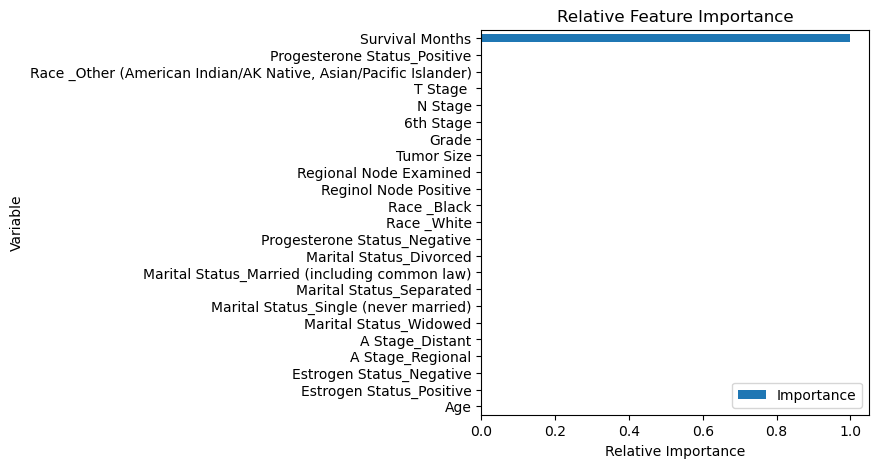

In [42]:
dt_imp = pd.DataFrame({'Importance':list(dt_optimised.feature_importances_)},index=X.columns)
dt_imp_sorted = dt_imp.sort_values(by=('Importance'),ascending=True)
dt_imp_sorted.plot.barh(figsize=(5,5))
plt.title('Relative Feature Importance')
plt.xlabel('Relative Importance')
plt.ylabel('Variable')
plt.legend(loc=4)

It looks like that `Survival Months` was the main driver in this classification problem.

We will calculate the predicting accuracy for the training data.

In [43]:
dt_optimised_pred_train = dt_optimised.predict(X_train)

We will calculate the predicting accuracy for the test data.

In [44]:
dt_optimised_pred_test = dt_optimised.predict(X_test)

In [45]:
cm = pd.DataFrame(confusion_matrix(y_test, dt_optimised_pred_test))
cm['Total'] = np.sum(cm, axis = 1)
cm = cm.append(np.sum(cm, axis=1), ignore_index=True)
cm.columns = ['Predicted Alive','Predicted Dead','Total']
cm = cm.set_index([['Alive','Dead','Total']])
print(cm)

       Predicted Alive  Predicted Dead  Total
Alive            650.0            32.0  682.0
Dead              61.0            62.0  123.0
Total           1364.0           246.0    NaN


In [47]:
print(classification_report(y_test, dt_optimised_pred_test))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       682
           1       0.66      0.50      0.57       123

    accuracy                           0.88       805
   macro avg       0.79      0.73      0.75       805
weighted avg       0.88      0.88      0.88       805



### 3. SVC Classifier

We will instantiate the classifier with default hyperparameters.

In [48]:
svc=SVC() 

We will fit classifier to training dataset.

In [49]:
svc.fit(X_train,y_train)

SVC()

We will calculate the predicting accuracy for the training data.

In [50]:
svc_pred_train = svc.predict(X_train)

We will calculate the predicting accuracy for the test data. We will make predictions on test dataset.

In [51]:
svc_pred_test =svc.predict(X_test)

In [53]:
print('SVC:\n> Accuracy on training data = {:.4f}\n> Accuracy on validation data = {:.4f}'.format( accuracy_score(y_true=y_train, y_pred=svc_pred_train), accuracy_score(y_true=y_test, y_pred=svc_pred_test)))

SVC:
> Accuracy on training data = 0.8947
> Accuracy on validation data = 0.8758


Support Vector Classifier has almost the same accuracy on test data and on training data.

We will compute and print accuracy score.

In [55]:
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, svc_pred_test)))

Model accuracy score with default hyperparameters: 0.8758


In [57]:
cm = pd.DataFrame(confusion_matrix(y_test, svc_pred_test))
cm['Total'] = np.sum(cm, axis = 1)
cm = cm.append(np.sum(cm, axis=1), ignore_index=True)
cm.columns = ['Predicted Alive','Predicted Dead','Total']
cm = cm.set_index([['Alive','Dead','Total']])
print(cm)

       Predicted Alive  Predicted Dead  Total
Alive            673.0             9.0  682.0
Dead              91.0            32.0  123.0
Total           1364.0           246.0    NaN


From the confusion matrix, we can see that 682 observations that were classified as alive, 673 were classified correctly, and of the 123 observations that were classified as dead, 32 were correctly classified.

In [58]:
print(classification_report(y_test, svc_pred_test))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       682
           1       0.78      0.26      0.39       123

    accuracy                           0.88       805
   macro avg       0.83      0.62      0.66       805
weighted avg       0.87      0.88      0.85       805



In [59]:
grid_svc = {'C': np.linspace(1,10,10),
            'kernel': ['linear','poly','rbf','sigmoid']}

In [60]:
model_svc = GridSearchCV(SVC(gamma='auto'),grid_svc,scoring='f1',cv=5,error_score='raise')

In [61]:
model_svc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise', estimator=SVC(gamma='auto'),
             param_grid={'C': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='f1')

In [62]:
best_parameters = model_svc.best_params_
print(best_parameters)

{'C': 7.0, 'kernel': 'linear'}


We will instantiate the classifier with linear kernel and C = 7.0.

In [63]:
svc_linear=SVC(kernel='linear', C=7.0) 

We will fit the classifier to the training dataset.

In [64]:
svc_linear.fit(X_train,y_train)

SVC(C=7.0, kernel='linear')

We will make predictions on the test set.

In [65]:
svc_pred_linear = svc_linear.predict(X_test)

We will compute the accuracy score.

In [66]:
print('Model accuracy score with linear kernel and C=3.0 : {0:0.4f}'. format(accuracy_score(y_test, svc_pred_linear)))

Model accuracy score with linear kernel and C=3.0 : 0.8795


### 4. RandomForest Classifier

We will instantiate the classifier.

In [67]:
rfc = RandomForestClassifier()

We wil fit the model.

In [68]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

We will predict the accuracy on training data.

In [69]:
rfc_pred_train = rfc.predict(X_train)

We will predict the accuracy on test data.

In [70]:
rfc_pred_test = rfc.predict(X_test)

In [71]:
print('Random Forest:\n> Accuracy on training data = {:.4f}\n> Accuracy on validation data = {:.4f}'.format( accuracy_score(y_true=y_train, y_pred=rfc_pred_train), accuracy_score(y_true=y_test, y_pred=rfc_pred_test)))

Random Forest:
> Accuracy on training data = 1.0000
> Accuracy on validation data = 0.8907


In [72]:
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, rfc_pred_test)))

Model accuracy score with 10 decision-trees : 0.8907


We will create the classifier with n_estimators = 100.

In [73]:
clf = RandomForestClassifier(n_estimators=100)

We will fit the model to the training dataset.

In [74]:
clf.fit(X_train, y_train)

RandomForestClassifier()

We will view the feature scores using the followng code.

In [75]:
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

Survival Months                                                    0.381382
Age                                                                0.110338
Regional Node Examined                                             0.096176
Tumor Size                                                         0.096024
Reginol Node Positive                                              0.075444
Grade                                                              0.031658
6th Stage                                                          0.030390
T Stage                                                            0.025290
N Stage                                                            0.023626
Marital Status_Married (including common law)                      0.017551
Progesterone Status_Negative                                       0.013768
Progesterone Status_Positive                                       0.012118
Marital Status_Divorced                                            0.010868
Marital Stat

We will create a seaborn bar plot, add labels abd title to the graph using the following code.

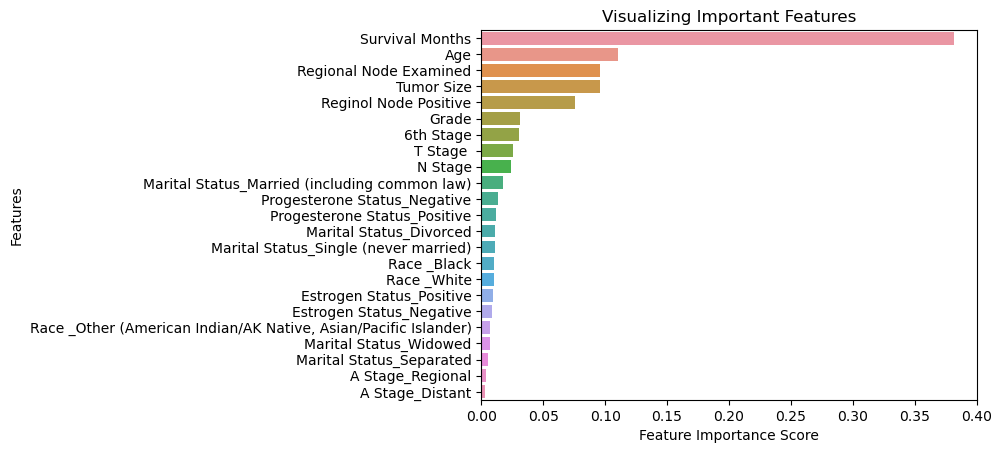

In [76]:
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()